**Preparation**

In [1]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: []


**Create the data generators**

In [3]:
!rm -rf dataset2
!mkdir dataset2
!7z x kaggle.zip -odataset2
!find dataset2 -maxdepth 3 -type d


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs AMD EPYC 7B12 (830F10),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 5591813 bytes (5461 KiB)

Extracting archive: kaggle.zip
--
Path = kaggle.zip
Type = zip
Physical Size = 5591813

  0%    Everything is Ok

Files: 629
Size:       5491851
Compressed: 5591813
dataset2
dataset2/animals_dataset
dataset2/animals_dataset/train
dataset2/animals_dataset/train/cat
dataset2/animals_dataset/train/dog
dataset2/animals_dataset/train/deep
dataset2/animals_dataset/train/cow
dataset2/animals_dataset/train/lion
dataset2/animals_dataset/test
dataset2/animals_dataset/test/cat
dataset2/animals_dataset/test/dog
dataset2/animals_dataset/test/deep
dataset2/animals_dataset/test/cow
dataset2/animals_dataset/test/lion
dataset2/animals_dataset/validation
dataset2/animals_dataset/validation/cat
dataset2/animals_datas

**Set Data Paths**

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 128
batch_size = 32

train_path = "dataset2/animals_dataset/train"
val_path = "dataset2/animals_dataset/validation"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical"
)

val_data = val_datagen.flow_from_directory(
    val_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical"
)

print("Class indices:", train_data.class_indices)

Found 464 images belonging to 5 classes.
Found 83 images belonging to 5 classes.
Class indices: {'cat': 0, 'cow': 1, 'deep': 2, 'dog': 3, 'lion': 4}


**Pre works for build the model**

In [10]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0003),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [11]:
Dense(64, activation="relu"),
Dropout(0.4),

(<Dropout name=dropout_1, built=True>,)

**Build CNN Model**

In [12]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = MobileNetV2(
    input_shape=(img_size, img_size, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False  # freeze base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.4)(x)
output = Dense(train_data.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=0.0003),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,340,293 (8.93 MB)

 Trainable params: 82,309 (321.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

**Train with callbacks**

In [13]:
callbacks = [
    EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", patience=2, factor=0.5, min_lr=1e-6)
]

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=25,
    callbacks=callbacks
)

Epoch 1/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 369ms/step - accuracy: 0.2621 - loss: 2.1874 - val_accuracy: 0.6747 - val_loss: 0.9842 - learning_rate: 3.0000e-04
Epoch 2/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 293ms/step - accuracy: 0.5544 - loss: 1.2135 - val_accuracy: 0.9277 - val_loss: 0.5430 - learning_rate: 3.0000e-04
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 331ms/step - accuracy: 0.6988 - loss: 0.7893 - val_accuracy: 0.9639 - val_loss: 0.3291 - learning_rate: 3.0000e-04
Epoch 4/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 296ms/step - accuracy: 0.8220 - loss: 0.5763 - val_accuracy: 0.9880 - val_loss: 0.2113 - learning_rate: 3.0000e-04
Epoch 5/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 328ms/step - accuracy: 0.8572 - loss: 0.4425 - val_accuracy: 0.9880 - val_loss: 0.1592 - learning_rate: 3.0000e-04
Epoch 6/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 299ms/step - accuracy: 0.8722 - loss: 0.4420 - val_accuracy: 0.9759 - val_loss: 0.1282 - learning_rate: 3.0000e-04
Epoch 7/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 296ms/step - accuracy:

**Valuation Checks**

In [14]:
print("Train samples:", train_data.samples)
print("Val samples:", val_data.samples)
print("Classes:", train_data.class_indices)

Train samples: 464
Val samples: 83
Classes: {'cat': 0, 'cow': 1, 'deep': 2, 'dog': 3, 'lion': 4}


In [15]:
from collections import Counter
print("Train distribution:", Counter(train_data.classes))
print("Val distribution:", Counter(val_data.classes))

Train distribution: Counter({np.int32(3): 111, np.int32(0): 91, np.int32(4): 89, np.int32(2): 87, np.int32(1): 86})
Val distribution: Counter({np.int32(0): 17, np.int32(2): 17, np.int32(3): 17, np.int32(4): 17, np.int32(1): 15})


In [19]:
val_data = val_datagen.flow_from_directory(
    val_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 83 images belonging to 5 classes.


**Evaluate (classification report + confusion matrix)**

In [20]:
val_data.reset()
pred = model.predict(val_data)
y_pred = np.argmax(pred, axis=1)

print(classification_report(val_data.classes, y_pred, target_names=class_names))
print(confusion_matrix(val_data.classes, y_pred))

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 280ms/step
              precision    recall  f1-score   support

         cat       1.00      1.00      1.00        17
         cow       1.00      1.00      1.00        15
        deep       1.00      1.00      1.00        17
         dog       1.00      1.00      1.00        17
        lion       1.00      1.00      1.00        17

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83

[[17  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0 17  0  0]
 [ 0  0  0 17  0]
 [ 0  0  0  0 17]]


**Plot accuracy/loss graphs**

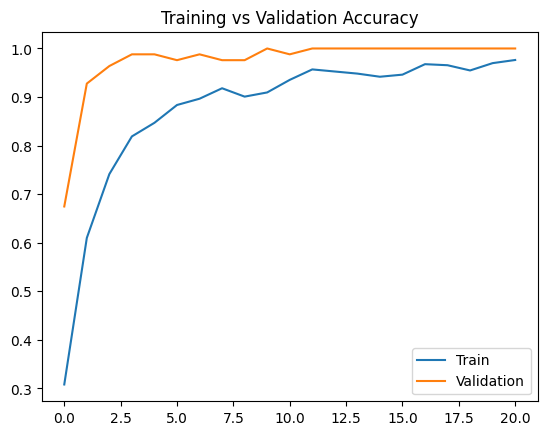

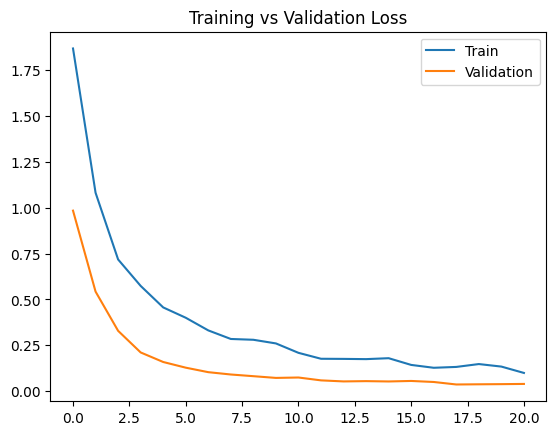

In [22]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Training vs Validation Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Training vs Validation Loss")
plt.legend(["Train", "Validation"])
plt.show()

**Save the model**

In [29]:
model.save("animal_classifier_model.keras")

In [30]:
model.save("animal_classifier_model.h5")

**Visualize Sample Predictions**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step


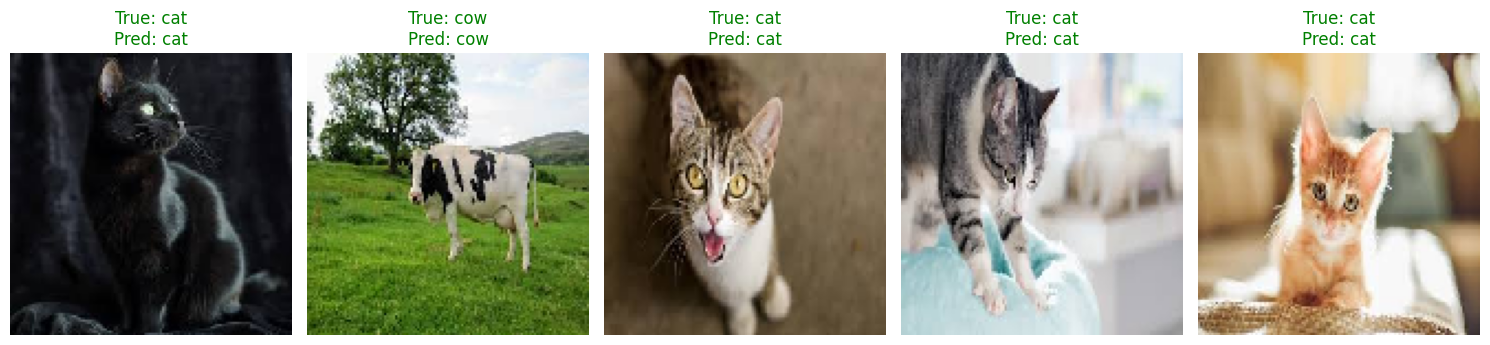

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Make sure validation generator is not shuffled
val_data.reset()

# Get class names in correct order
idx_to_class = {v: k for k, v in train_data.class_indices.items()}
class_names = [idx_to_class[i] for i in range(len(idx_to_class))]

# Get one batch from validation set
images, labels = next(val_data)

# Predict
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(labels, axis=1)

# Select 5 random samples from this batch
indices = random.sample(range(len(images)), 5)

plt.figure(figsize=(15, 6))

for i, idx in enumerate(indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[idx])
    plt.axis("off")

    true_label = class_names[true_classes[idx]]
    pred_label = class_names[predicted_classes[idx]]

    color = "green" if true_label == pred_label else "red"
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'T: cat\nP: cat\n1.00')

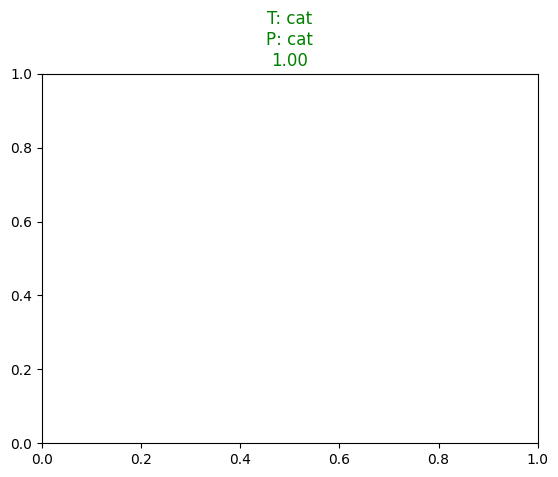

In [28]:
confidence = np.max(predictions[idx])
plt.title(f"T: {true_label}\nP: {pred_label}\n{confidence:.2f}", color=color)